Last updated on Sun Nov 20 12:37:45 2022


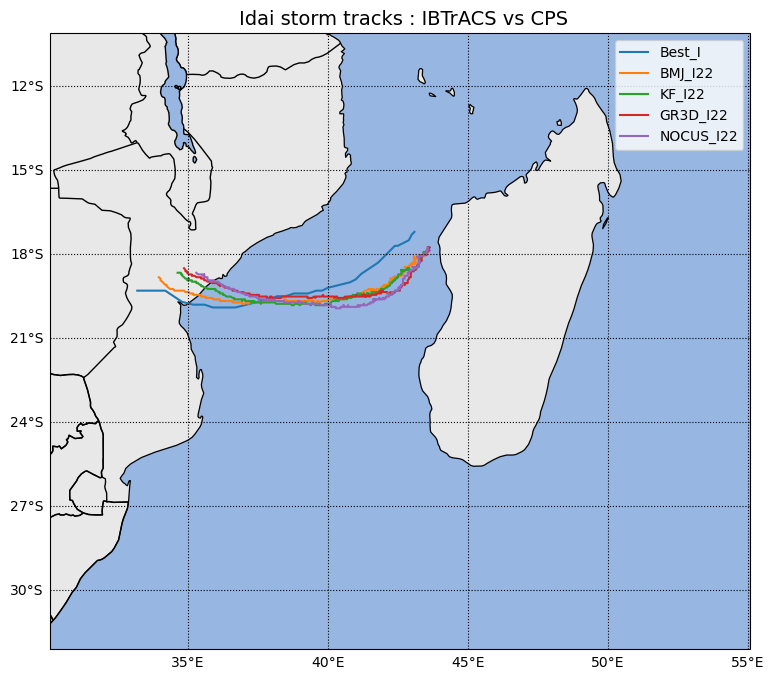

In [11]:
import os

import xarray as xr
import netCDF4

import math
import numpy as np
from scipy.ndimage import gaussian_filter
import cartopy
from cartopy import config
from cartopy.util import add_cyclic_point
import cartopy.feature as cfeature
import cartopy.crs as ccrs
from cartopy.mpl.geoaxes import GeoAxes
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid
import matplotlib.collections as collections

import IPython.display as IPdisplay, matplotlib.font_manager as fm
from PIL import Image
import glob

from sklearn.linear_model import LinearRegression
from scipy.signal import savgol_filter
 
import datetime as datetime
print('Last updated on {}'.format(datetime.datetime.now().ctime()))


#storms=['Nov1982','Oct1987','Herta',
#        'Viviane','Lothar','Martin',
#        'Klaus','Xynthia','Joachim', 'Zeus',
#        'Ophelia','Eleanor', 'Alex', 'Rolf', 'Zorbas']
#storms=['BMJ_I', 'BMJ_K','KF_I2','KF_K2','GR3D_I2','GR3D_K2','NOCUS_I2','NOCUS_K2']
storms=['Best_I','BMJ_I22','KF_I22','GR3D_I22','NOCUS_I22']

#latS=30 #uncomment the #ax.set_extent(*bounds, crs=ccrs.PlateCarree()) to apply this 4 lines
#latN=70
#lonW=-60
#lonE=35
projection=ccrs.PlateCarree()
#projection=ccrs.NearsidePerspective(central_longitude=0.0, central_latitude=45.0)
#bounds = [(lonW, lonE, latS, latN)]
#coast = cfeature.NaturalEarthFeature(category='physical', scale='110m', facecolor='none', name='coastline')
                             
fig = plt.figure(figsize=(12., 8.))
#fig.suptitle('Storm tracks : ERA5',fontsize=16)
ax = fig.add_subplot(1, 1, 1, projection=projection)
#ax.set_extent([-60.1,35.1, 30.1, 70.1], crs=ccrs.PlateCarree())
#ax = plt.subplot(3,2,1, projection=ccrs.PlateCarree())

#SWIO
#ax.set_extent([30.1,70.1,-30.1, 0.1], crs=ccrs.PlateCarree())
#Idai
ax.set_extent([30.1,55.1,-32.1, -10.1], crs=ccrs.PlateCarree())
#Kenneth
#ax.set_extent([30.1,70.1,-30.1, 0.1], crs=ccrs.PlateCarree())
#ax.set_title('Storm tracks : ERA5',loc='center',fontsize=14)
#ax.add_feature(coast, edgecolor='gray')
#ax.gridlines()


# Add the gridlines
gl=ax.gridlines(color="black", linestyle="dotted",draw_labels=True)
# Add features
ax.add_feature(cartopy.feature.LAND, color="lightgrey", alpha=0.5)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.BORDERS)
ax.add_feature(cartopy.feature.LAKES, edgecolor='black')
ax.add_feature(cartopy.feature.STATES)
ax.coastlines('50m', linewidth=0.9, edgecolor='black')
#ax.coastlines(color='black')# 
gl.top_labels = gl.right_labels = False    
gl.xlabel_style = {'size':10, 'color':'black'}  
gl.ylabel_style = {'size':10, 'color':'black'}
#ax.set_title(scheme_name[n],fontsize=10) #.
#ax.set_title('Storm tracks : Idai CPS',loc='center',fontsize=14)
ax.set_title(' Idai storm tracks : IBTrACS vs CPS',loc='center',fontsize=14)
#ax.set_extent([-60.1,35.1, 30.1, 70.1], crs=ccrs.PlateCarree())
#ax.set_extent(*bounds, crs=ccrs.PlateCarree()) #Original bounds, uncomment &comment above line
#ax.set_xticks(np.linspace(-180, 180, 37), crs=ccrs.PlateCarree())
#ax.set_yticks(np.linspace(-90, 90, 19), crs=ccrs.PlateCarree())
#lon_formatter = LongitudeFormatter(zero_direction_label=True)
#lat_formatter = LatitudeFormatter()
#ax.xaxis.set_major_formatter(lon_formatter)
#ax.yaxis.set_major_formatter(lat_formatter)

for storm in storms:

#--  Open storm track file
    liste_time,liste_lat,liste_lon,liste_pres=np.loadtxt('/mnt/g/RegCM4/Python/cru_2011.2020.pre/cps_txt/x/'+storm+'.txt',skiprows=0,dtype='U13, float,float,int',unpack=True)
    date1=str(liste_time[0])
    date2=str(liste_time[-1])
    
    #print(liste_lon,liste_lat)
    #ax.plot(liste_lon,liste_lat, transform=ccrs.PlateCarree(), label=storm+' '+date1+'-'+date2) #original
    ax.plot(liste_lon,liste_lat, transform=ccrs.PlateCarree(), label=storm ) #+' '+date1+'-'+date2)
    #ax.text(liste_lon[0]-1, liste_lat[0], storm, verticalalignment='center', horizontalalignment='right',transform=ccrs.PlateCarree()._as_mpl_transform(ax),
    #bbox=dict(alpha=0.1, boxstyle='round'))

ax.legend(loc='upper right')
plt.show()

Last updated on Sun Nov 20 12:36:49 2022


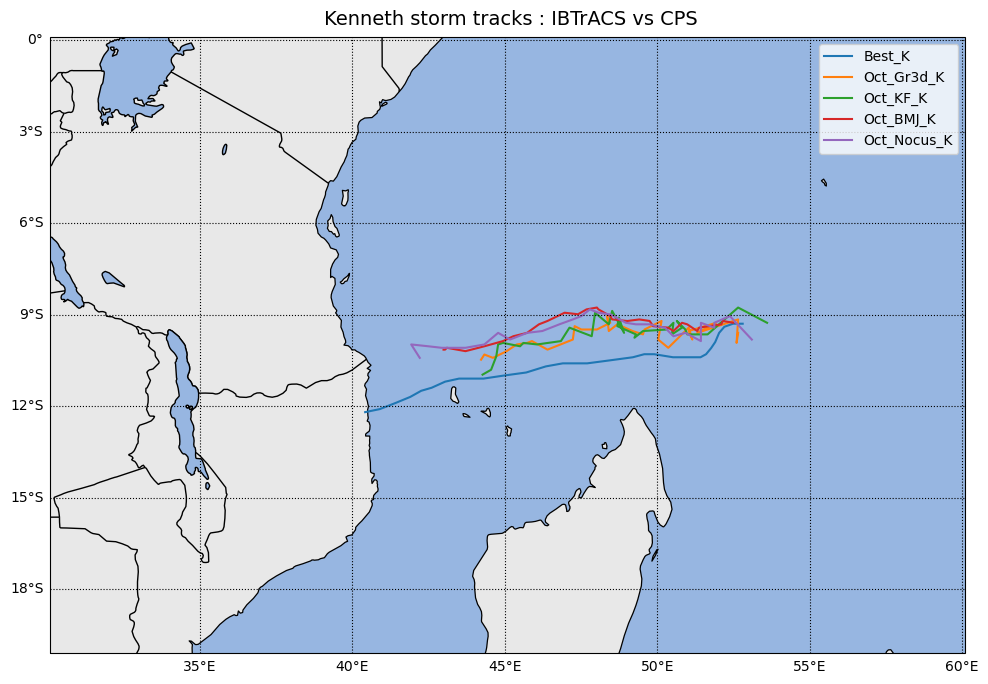

In [9]:
import os

import xarray as xr
import netCDF4

import math
import numpy as np
from scipy.ndimage import gaussian_filter
import cartopy
from cartopy import config
from cartopy.util import add_cyclic_point
import cartopy.feature as cfeature
import cartopy.crs as ccrs
from cartopy.mpl.geoaxes import GeoAxes
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid
import matplotlib.collections as collections

import IPython.display as IPdisplay, matplotlib.font_manager as fm
from PIL import Image
import glob

from sklearn.linear_model import LinearRegression
from scipy.signal import savgol_filter
 
import datetime as datetime
print('Last updated on {}'.format(datetime.datetime.now().ctime()))


#storms=['Nov1982','Oct1987','Herta',
#        'Viviane','Lothar','Martin',
#        'Klaus','Xynthia','Joachim', 'Zeus',
#        'Ophelia','Eleanor', 'Alex', 'Rolf', 'Zorbas']
#storms=['BMJ_I', 'BMJ_K','KF_I2','KF_K2','GR3D_I2','GR3D_K2','NOCUS_I2','NOCUS_K2']
#storms=['BMJ_I22','KF_I22','GR3D_I22','NOCUS_I22']
storms=['Best_K', 'Oct_Gr3d_K','Oct_KF_K','Oct_BMJ_K','Oct_Nocus_K']

#latS=30 #uncomment the #ax.set_extent(*bounds, crs=ccrs.PlateCarree()) to apply this 4 lines
#latN=70
#lonW=-60
#lonE=35
projection=ccrs.PlateCarree()
#projection=ccrs.NearsidePerspective(central_longitude=0.0, central_latitude=45.0)
#bounds = [(lonW, lonE, latS, latN)]
#coast = cfeature.NaturalEarthFeature(category='physical', scale='110m', facecolor='none', name='coastline')
                             
fig = plt.figure(figsize=(12., 8.))
#fig.suptitle('Storm tracks : ERA5',fontsize=16)
ax = fig.add_subplot(1, 1, 1, projection=projection)
#ax.set_extent([-60.1,35.1, 30.1, 70.1], crs=ccrs.PlateCarree())
#ax = plt.subplot(3,2,1, projection=ccrs.PlateCarree())

#SWIO
#ax.set_extent([30.1,70.1,-30.1, 0.1], crs=ccrs.PlateCarree())
#Idai
#ax.set_extent([30.1,45.1,-22.1, -15.1], crs=ccrs.PlateCarree())
#Kenneth
ax.set_extent([30.1,60.1,-20.1, 0.1], crs=ccrs.PlateCarree())
#ax.set_title('Storm tracks : ERA5',loc='center',fontsize=14)
#ax.add_feature(coast, edgecolor='gray')
#ax.gridlines()


# Add the gridlines
gl=ax.gridlines(color="black", linestyle="dotted",draw_labels=True)
# Add features
ax.add_feature(cartopy.feature.LAND, color="lightgrey", alpha=0.5)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.BORDERS)
ax.add_feature(cartopy.feature.LAKES, edgecolor='black')
ax.add_feature(cartopy.feature.STATES)
ax.coastlines('50m', linewidth=0.9, edgecolor='black')
#ax.coastlines(color='black')# 
gl.top_labels = gl.right_labels = False    
gl.xlabel_style = {'size':10, 'color':'black'}  
gl.ylabel_style = {'size':10, 'color':'black'}
#ax.set_title(scheme_name[n],fontsize=10) #.
#ax.set_title('Idai storm tracks : IBTrACS vs CPS',loc='center',fontsize=14)
ax.set_title(' Kenneth storm tracks : IBTrACS vs CPS',loc='center',fontsize=14)
#ax.set_extent([-60.1,35.1, 30.1, 70.1], crs=ccrs.PlateCarree())
#ax.set_extent(*bounds, crs=ccrs.PlateCarree()) #Original bounds, uncomment &comment above line
#ax.set_xticks(np.linspace(-180, 180, 37), crs=ccrs.PlateCarree())
#ax.set_yticks(np.linspace(-90, 90, 19), crs=ccrs.PlateCarree())
#lon_formatter = LongitudeFormatter(zero_direction_label=True)
#lat_formatter = LatitudeFormatter()
#ax.xaxis.set_major_formatter(lon_formatter)
#ax.yaxis.set_major_formatter(lat_formatter)

for storm in storms:

#--  Open storm track file
    liste_time,liste_lat,liste_lon,liste_pres=np.loadtxt('/mnt/g/RegCM4/Python/cru_2011.2020.pre/cps_txt/x/'+storm+'.txt',skiprows=0,dtype='U13, float,float,int',unpack=True)
    date1=str(liste_time[0])
    date2=str(liste_time[-1])
    
    #print(liste_lon,liste_lat)
    #ax.plot(liste_lon,liste_lat, transform=ccrs.PlateCarree(), label=storm+' '+date1+'-'+date2) #original
    ax.plot(liste_lon,liste_lat, transform=ccrs.PlateCarree(), label=storm ) #+' '+date1+'-'+date2)
    #ax.text(liste_lon[0]-1, liste_lat[0], storm, verticalalignment='center', horizontalalignment='right',transform=ccrs.PlateCarree()._as_mpl_transform(ax),
    #bbox=dict(alpha=0.1, boxstyle='round'))

ax.legend(loc='upper right')
plt.show()